In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [137]:
# Load the public dataset
df = pd.read_csv('phishing_emails.csv')

X = data_frame.iloc[:,1:-1].values
y = data_frame.iloc[:,-1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion matrix:")
print(conf_mat)
print(f"Accuracy: {accuracy}")


Confusion matrix:
[[727  12]
 [ 11 285]]
Accuracy: 0.9777777777777777


In [138]:
data_frame = pd.read_csv('phishing_emails.csv')
print(data_frame.shape)
data_frame.head()

(5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [139]:
data_frame.isnull().any().value_counts()

False    3002
dtype: int64

In [140]:
X_data = data_frame.iloc[:,1:-1]
print(X_data.shape)
X_data

(5172, 3000)


,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [141]:
Y_data = data_frame.iloc[:,-1].values
print(Y_data, Y_data.shape)

[0 0 0 ... 1 1 0] (5172,)


spam count: 1500
true count: 3672


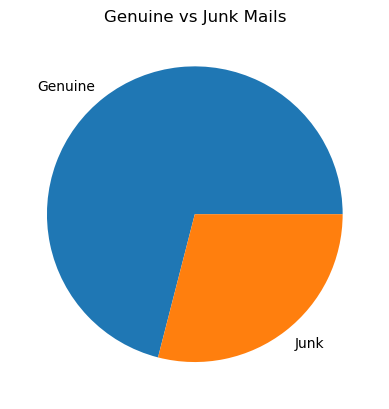

In [142]:
print(f'spam count: {len(data_frame[data_frame.Prediction == 1])}')
print(f'true count: {len(data_frame[data_frame.Prediction == 0])}')

bin_value = pd.value_counts(data_frame['Prediction'], sort=True)
plt.pie(bin_value, labels=['Genuine', 'Junk'])
plt.title('Genuine vs Junk Mails')
plt.ylabel('')
plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=8)

In [144]:
mnb = MultinomialNB(alpha=1.8)
mnb.fit(X_train,y_train)
y_pred_1 = mnb.predict(X_test)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred_1,y_test))

Accuracy Score for Naive Bayes :  0.9528228924980665


In [145]:
models = {
    "Linear Support Vector Machine ": LinearSVC(random_state = 8, max_iter = 4000),
    "Logistic Regression": LogisticRegression(random_state = 8, solver = 'lbfgs', max_iter = 1800),
    "Polynomial Support Vector Machine ": SVC(kernel = "poly", degree = 2, random_state = 8),
    "Multinomial Naive Bayes Classifier": MultinomialNB(alpha = 1.8),
    "Radial basis function kernel Support Vector Machine ": SVC(C = 1.0, kernel = 'rbf', gamma = 'auto'),
    "Sigmoid Support Vector Machine ": SVC(kernel="sigmoid", random_state = 8),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 100,criterion = 'gini'),
    "Multi-layer Perceptron Classification": MLPClassifier(hidden_layer_sizes = [20, 20], learning_rate = 'adaptive', random_state = 8),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbor(KNN) Classifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
}

In [152]:
for model_name, model in models.items():
    y_pred = model.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    print(f"{model_name} model: ")
    print("Accuracy:", accuracy, "   Precision:", precision, "   Recall:", recall, "    F1 Score:", f1, "   AUC-ROC Score:", roc_auc, "\n")

Linear Support Vector Machine  model: 
Accuracy: 0.9706109822119103    Precision: 0.9468354430379747    Recall: 0.9565217391304348     F1 Score: 0.9516539440203564    AUC-ROC Score: 0.9666200713390533 

Logistic Regression model: 
Accuracy: 0.9806651198762568    Precision: 0.9716494845360825    Recall: 0.9641943734015346     F1 Score: 0.9679075738125802    AUC-ROC Score: 0.9759996257251575 

Polynomial Support Vector Machine  model: 
Accuracy: 0.7440061871616396    Precision: 0.9411764705882353    Recall: 0.1636828644501279     F1 Score: 0.27886710239651424    AUC-ROC Score: 0.5796241373248422 

Multinomial Naive Bayes Classifier model: 
Accuracy: 0.9528228924980665    Precision: 0.9044117647058824    Recall: 0.9437340153452686     F1 Score: 0.9236545682102628    AUC-ROC Score: 0.9502483823954725 

Radial basis function kernel Support Vector Machine  model: 
Accuracy: 0.8948182521268369    Precision: 0.8947368421052632    Recall: 0.7391304347826086     F1 Score: 0.8095238095238095    A

In [147]:
mlp = MLPClassifier(hidden_layer_sizes = [20, 20], learning_rate = 'adaptive', random_state = 8)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

In [148]:
print("Accuracy Score of Multi-layer Perceptron Classification : ", accuracy_score(y_pred, y_test)*100)

cross_valid = cross_val_score(mlp, X_train, y_train , cv=10)
cross_valid = cross_valid.mean()*100
print(" Cross Validity Score of Multi-layer Perceptron Classification : ", cross_valid)

conf_matrix = confusion_matrix(y_test, y_pred)
print(" confusion matrix : ", conf_matrix)


Accuracy Score of Multi-layer Perceptron Classification :  98.14385150812065
 Cross Validity Score of Multi-layer Perceptron Classification :  97.78290577799089
 confusion matrix :  [[892  10]
 [ 14 377]]


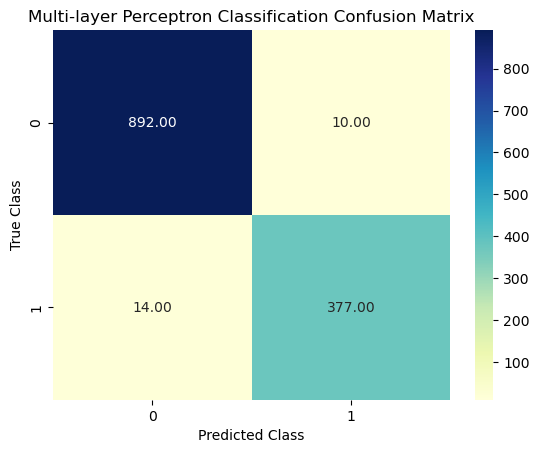

In [149]:
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Multi-layer Perceptron Classification Confusion Matrix')
plt.show()